<h3>Jeff Flanegan</h3><p>Advanced Python<br>GeoJSON<br>2019-10-11</p>

<h3>Getting the Data</h3><p>This code requests and receives GeoJSON data from the USGS Earthquakes Hazards Program website. The latitude, longitude, and magnitude are parsed from the object notation for each significant earthquake reported in the last 30 days.</p>

In [6]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl
import string

#data location
serviceurl = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.geojson'

#request and open access to data, then read
uh = urllib.request.urlopen(serviceurl)
data = uh.read()

#refator data to json
try:
    js = json.loads(data)
except:
    js = None
#print(json.dumps(js, indent=4))

#parse needed data
count = js['metadata']['count'] #extract 'quake number
if count < 1:
    print("there have been no Significant Earthquakes reported within the last 30 days")
else:
    print("\n",count," Significant Earthquakes in the last 30 days:\n")
    earthquakes = [] #list of 'quakes
    maxmag = 0
    maxlat = 0
    maxlong = 0
    mags = [] #list of magnitudes
    locs = [] #list of locations
    
    #get coordinates for each earthquake
    i = 0
    while i < count:
        location = js['features'][i]['properties']['place']
        latlong = js['features'][i]['geometry']['coordinates']
        mag = js['features'][i]['properties']['mag']
        locs.append(location)
        mags.append(mag)
        
        #cast coordinates to strings
        long = latlong[0]
        long = str(long)
        long = long.strip()
        lat = latlong[1]
        lat = str(lat)
        lat = lat.strip()
        
        #find greatest magnitude
        if mag > maxmag:
            maxmag = mag
            maxlat = lat
            maxlong = long
            
        #output results for every earthquake found
        print(location)
        print("lat: ",lat,", long: ",long, ", magnitude: ",mag,"\n")
        i+=1
if count > 0:
    print("Greatest magnitude: ",maxmag)



 14  Significant Earthquakes in the last 30 days:

5km WSW of Colma, CA
lat:  37.6598333 , long:  -122.5145 , magnitude:  3.54 

71km WNW of Talkeetna, Alaska
lat:  62.4784 , long:  -151.52 , magnitude:  5 

69km WSW of Constitucion, Chile
lat:  -35.4756 , long:  -73.1631 , magnitude:  6.7 

84km SSE of Pondaguitan, Philippines
lat:  5.6882 , long:  126.5476 , magnitude:  6.2 

30km WSW of Villa La Angostura, Argentina
lat:  -40.8152 , long:  -72.0019 , magnitude:  6.1 

20km ESE of Marmaraereglisi, Turkey
lat:  40.89 , long:  28.1727 , magnitude:  5.7 

10km S of Kairatu, Indonesia
lat:  -3.45 , long:  128.3471 , magnitude:  6.5 

3km S of New Mirpur, Pakistan
lat:  33.1062 , long:  73.7655 , magnitude:  5.6 

54km NNW of San Antonio, Puerto Rico
lat:  19.0225 , long:  -67.2081 , magnitude:  5.06 

69km NNW of San Antonio, Puerto Rico
lat:  19.077 , long:  -67.2701 , magnitude:  6 

6km N of Durres, Albania
lat:  41.3807 , long:  19.4543 , magnitude:  5.6 

70km NNE of Blimbing, Indo

<br><h3>Magnitude Graph</h3><p>This shows the magnitude of each earthquake at its location from the previous data retreived. Chart is horizontal to show locations without overlap</p>

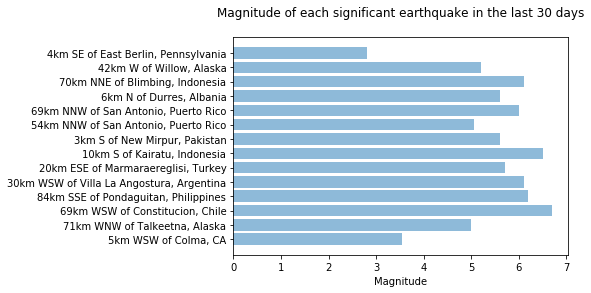

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_pos = np.arange(len(locs)) #sort and get amount of bars
plt.barh(y_pos, mags, align='center', alpha=0.5) #set scalar, max, align and step
plt.yticks(y_pos, locs) #set y axis by location

plt.xlabel('Magnitude')
plt.title('Magnitude of each significant earthquake in the last 30 days\n')
plt.show()

<br><h3>Greatest Magnitude Location</h3><p>This code embeds a google map using a google cloud API. The coordinates from the earthquake with the greatest magnitude are input into the HTTP format and uses the place marker to mark the location on the interactive map. The map is displayed using IFrame to a specific pixel size.</p>

In [8]:
from IPython.display import IFrame
print("lat: ",maxlat,", long: ",maxlong, ", magnitude: ",maxmag,"\n")

api = "ENTER YOUR KEY HERE" #key for embedded usage

url = "https://www.google.com/maps/embed/v1/place?key="+api+"&q="+maxlat+","+maxlong+"&zoom=12&maptype=satellite"
IFrame(url, width=600, height=450) #viewport window

lat:  -35.4756 , long:  -73.1631 , magnitude:  6.7 

